## 1. Which product categories are the most popular among customers?

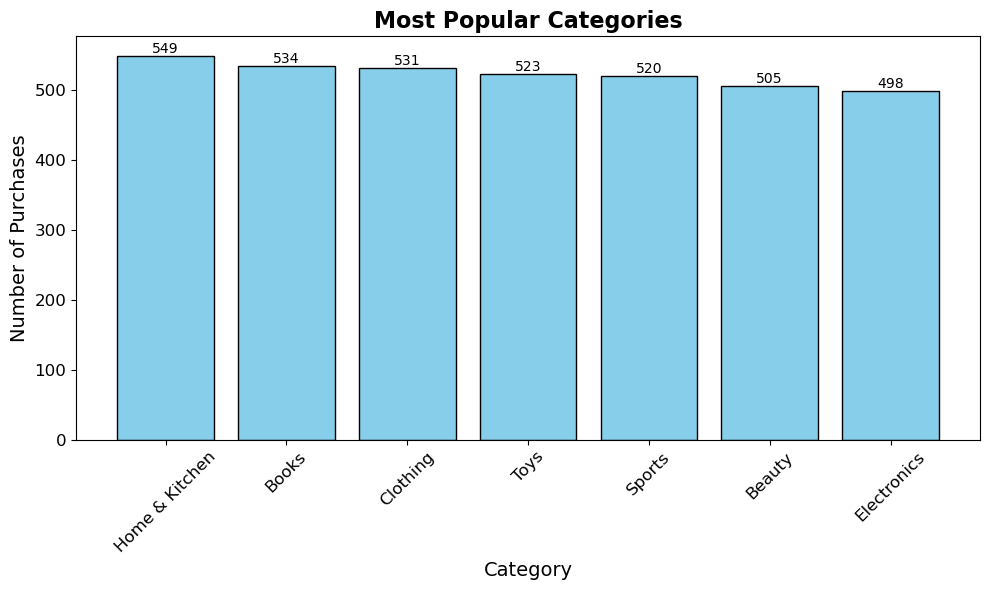

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
# Load the data
file_path = 'harshit.data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Count the occurrences of each product category
category_counts = data['Category'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Most Popular Categories', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


## 2. What is the most common payment method across product categories?

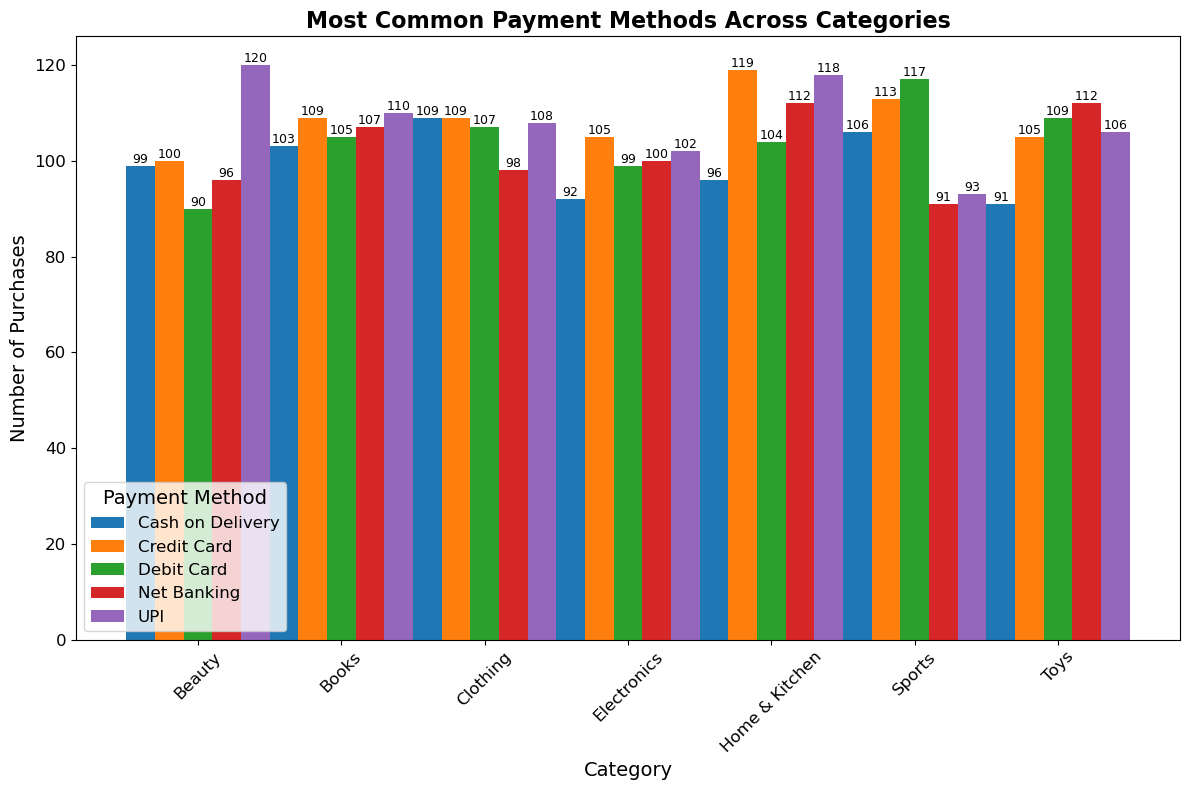

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'harshit.data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Count the occurrences of each payment method across product categories
payment_method_counts = data.groupby(['Category', 'Payment_Method']).size().unstack(fill_value=0)

# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
categories = payment_method_counts.index
payment_methods = payment_method_counts.columns
bar_width = 0.2
x = range(len(categories))

# Plot bars for each payment method
bars = []
for i, method in enumerate(payment_methods):
    bar_positions = [pos + i * bar_width for pos in x]
    bars.append(plt.bar(bar_positions, payment_method_counts[method], bar_width, label=method))

# Add data labels to each bar
for i, bar_group in enumerate(bars):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
                     ha='center', va='bottom', fontsize=9)

# Add titles and labels
plt.title('Most Common Payment Methods Across Categories', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks([pos + (len(payment_methods) - 1) * bar_width / 2 for pos in x], categories, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Payment Method', fontsize=12, title_fontsize=14)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


## 3.Which product categories generate the highest revenue?

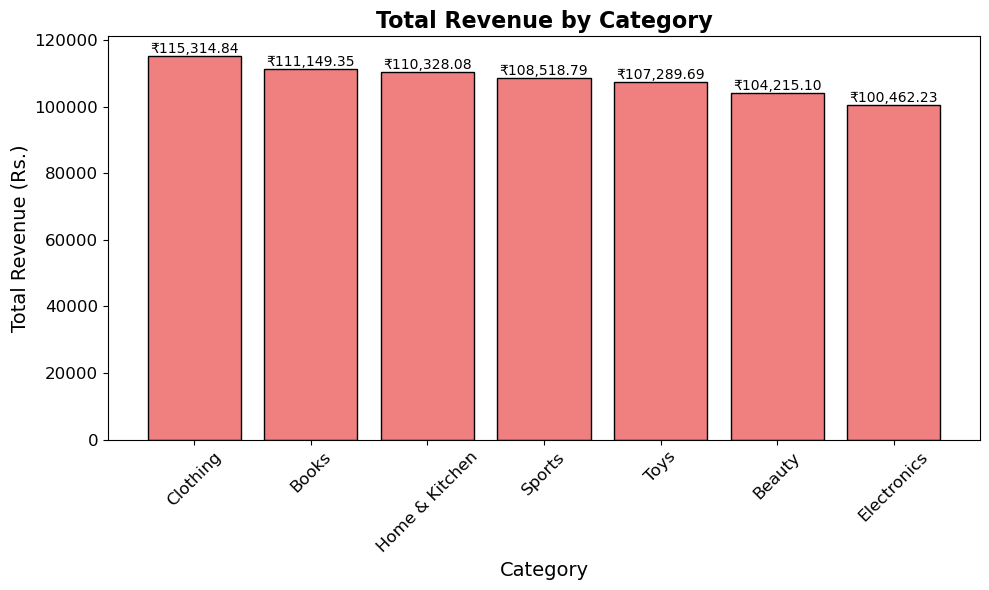

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'harshit.data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Calculate total revenue for each product category
category_revenue = data.groupby('Category')['Final_Price(Rs.)'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(category_revenue.index, category_revenue.values, color='lightcoral', edgecolor='black')

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'₹{height:,.2f}', 
             ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Total Revenue by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Revenue (Rs.)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


## 4. What is the correlation between discount percentage and final price?

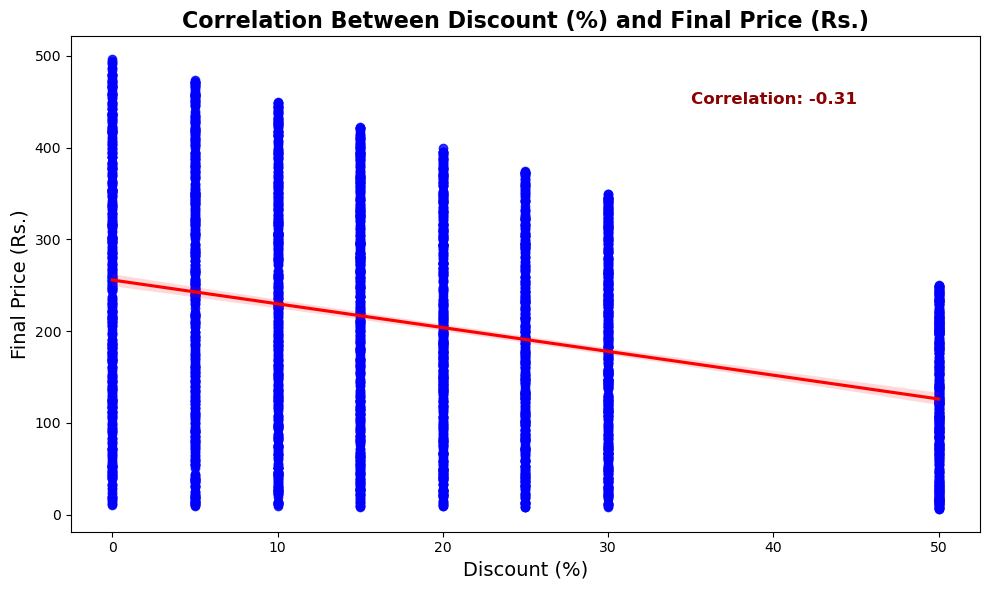

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'harshit.data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Calculate the correlation coefficient
correlation = data['Discount (%)'].corr(data['Final_Price(Rs.)'])

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount (%)', y='Final_Price(Rs.)', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add titles, labels, and the correlation value
plt.title('Correlation Between Discount (%) and Final Price (Rs.)', fontsize=16, fontweight='bold')
plt.xlabel('Discount (%)', fontsize=14)
plt.ylabel('Final Price (Rs.)', fontsize=14)
plt.text(max(data['Discount (%)']) * 0.7, max(data['Final_Price(Rs.)']) * 0.9, 
         f'Correlation: {correlation:.2f}', fontsize=12, color='darkred', weight='bold')

# Improve layout and show the plot
plt.tight_layout()
plt.show()


## 5. Which products consistently have the highest discounts?

Column Names: Index(['User_ID', 'Product_ID', 'Category', 'Price (Rs.)', 'Discount (%)',
       'Final_Price(Rs.)', 'Payment_Method', 'Purchase_Date'],
      dtype='object')


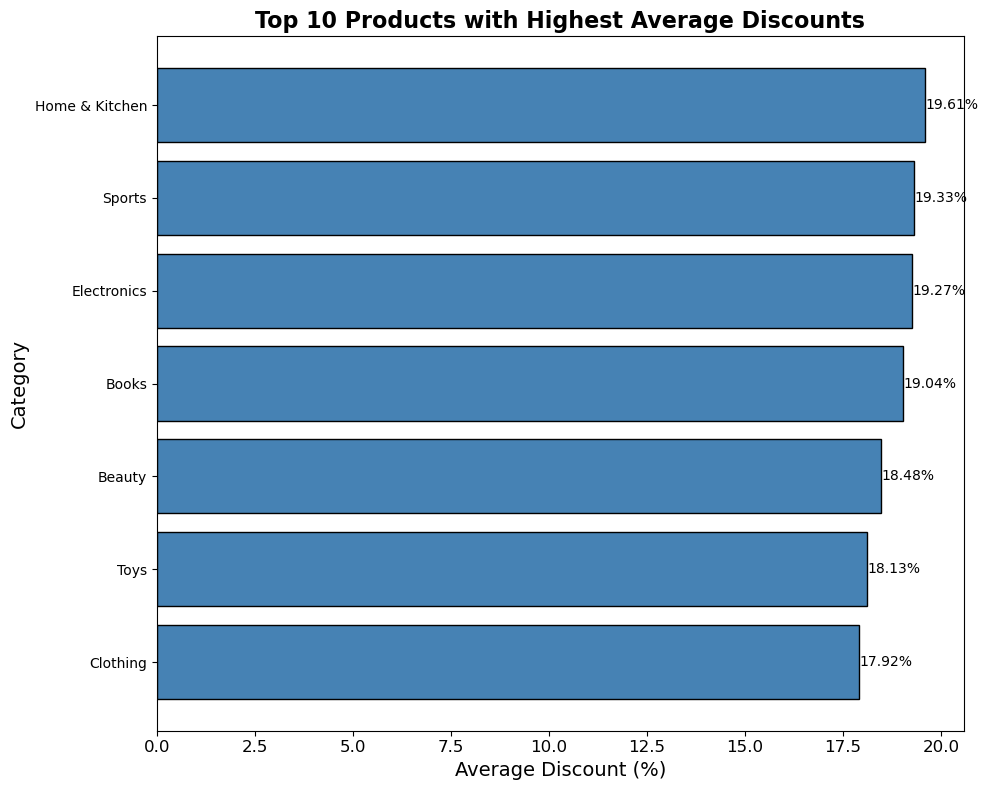

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'harshit.data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Verify column names
print("Column Names:", data.columns)

# Update 'Product_Name' to match the actual column name from the dataset
# Replace 'Actual_Product_Column' with the correct column name
product_discounts = data.groupby('Category')['Discount (%)'].mean().sort_values(ascending=False).head(10)

# Plot the top products with the highest average discounts
plt.figure(figsize=(10, 8))
bars = plt.barh(product_discounts.index, product_discounts.values, color='steelblue', edgecolor='black')

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
             ha='left', va='center', fontsize=10)

# Add titles and labels
plt.title('Top 10 Products with Highest Average Discounts', fontsize=16, fontweight='bold')
plt.xlabel('Average Discount (%)', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Improve layout and show the plot
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert y-axis to show the highest discount on top
plt.show()


## 6. What is the average price before and after discounts for each product category?

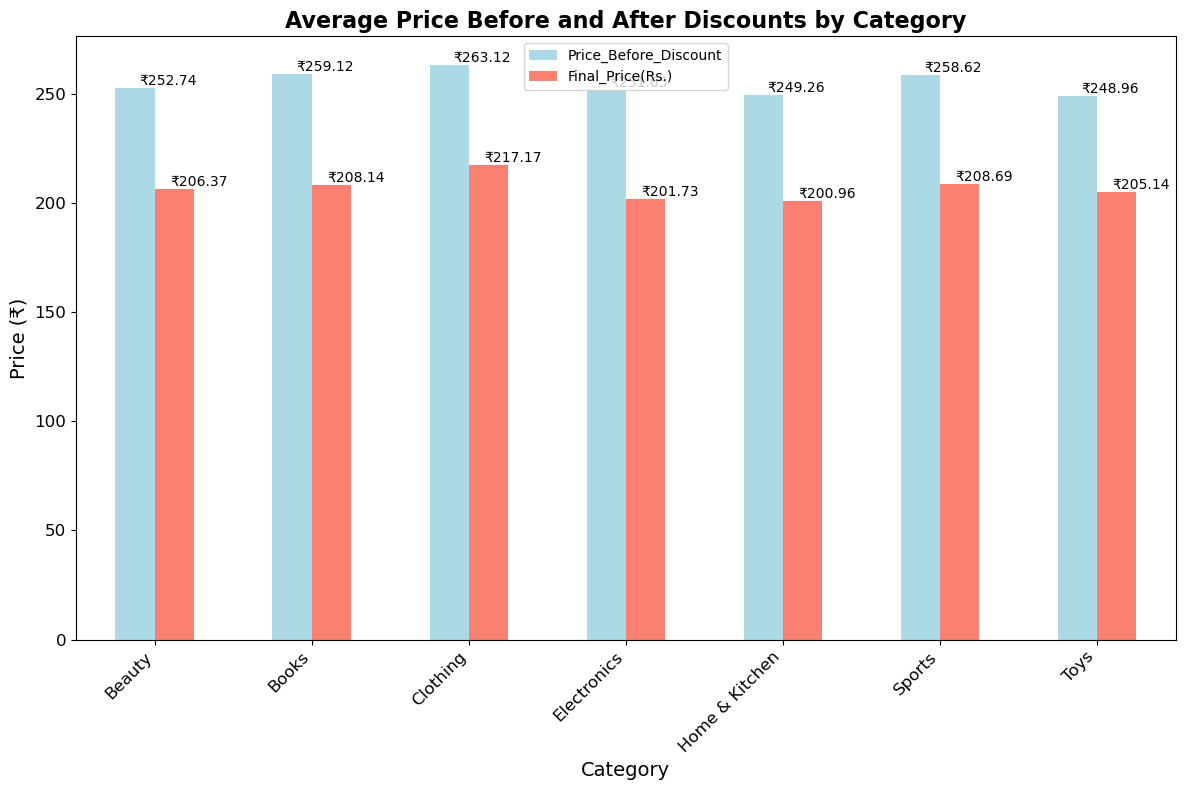

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'harshit.data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Strip whitespace from column names (if any)
data.columns = data.columns.str.strip()

# Calculate the price before discount for each product
data['Price_Before_Discount'] = data['Final_Price(Rs.)'] / (1 - data['Discount (%)'] / 100)

# Group by product category and calculate the average price before and after discounts
avg_prices = data.groupby('Category')[['Price_Before_Discount', 'Final_Price(Rs.)']].mean()

# Plot the average prices before and after discounts for each product category
avg_prices.plot(kind='bar', figsize=(12, 8), color=['lightblue', 'salmon'])

# Add data labels on top of the bars
for index, value in enumerate(avg_prices['Price_Before_Discount']):
    plt.text(index - 0.1, value + 0.05, f'₹{value:,.2f}', fontsize=10, va='bottom')
for index, value in enumerate(avg_prices['Final_Price(Rs.)']):
    plt.text(index + 0.1, value + 0.05, f'₹{value:,.2f}', fontsize=10, va='bottom')

# Add titles and labels
plt.title('Average Price Before and After Discounts by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Price (₹)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


## 7. Do certain users purchase more frequently or spend more on average?

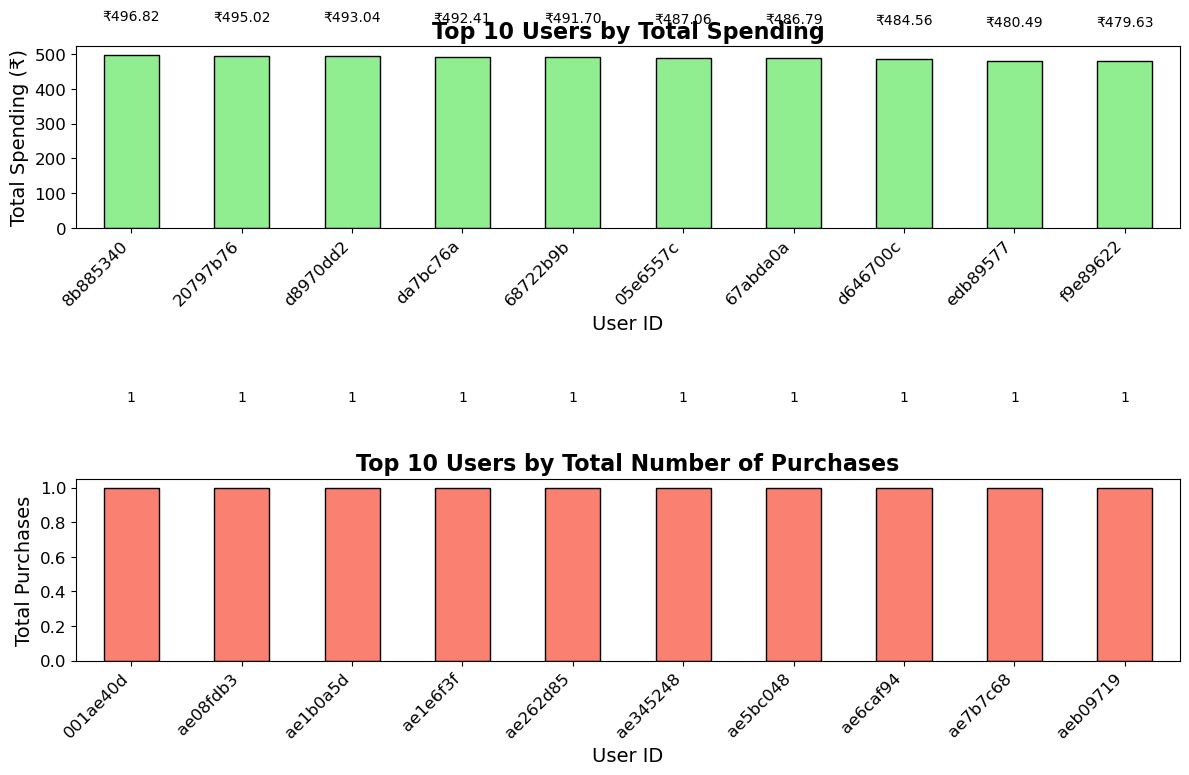

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'harshit.data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Strip whitespace from column names (if any)
data.columns = data.columns.str.strip()

# Calculate total spending and total number of purchases per user
user_spending = data.groupby('User_ID')['Final_Price(Rs.)'].sum().sort_values(ascending=False)
user_purchases = data.groupby('User_ID')['Product_ID'].count().sort_values(ascending=False)

# Plot the total spending per user (Top 10 users with highest spending)
plt.figure(figsize=(12, 8))

# Subplot for spending
plt.subplot(2, 1, 1)
user_spending.head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Users by Total Spending', fontsize=16, fontweight='bold')
plt.xlabel('User ID', fontsize=14)
plt.ylabel('Total Spending (₹)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add data labels for total spending
for index, value in enumerate(user_spending.head(10)):
    plt.text(index, value + 100, f'₹{value:,.2f}', ha='center', fontsize=10)

# Subplot for number of purchases
plt.subplot(2, 1, 2)
user_purchases.head(10).plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Users by Total Number of Purchases', fontsize=16, fontweight='bold')
plt.xlabel('User ID', fontsize=14)
plt.ylabel('Total Purchases', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add data labels for number of purchases
for index, value in enumerate(user_purchases.head(10)):
    plt.text(index, value + 0.5, f'{value}', ha='center', fontsize=10)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


## 8. What is the average basket value per transaction?

Average Basket Value per Transaction: ₹206.91


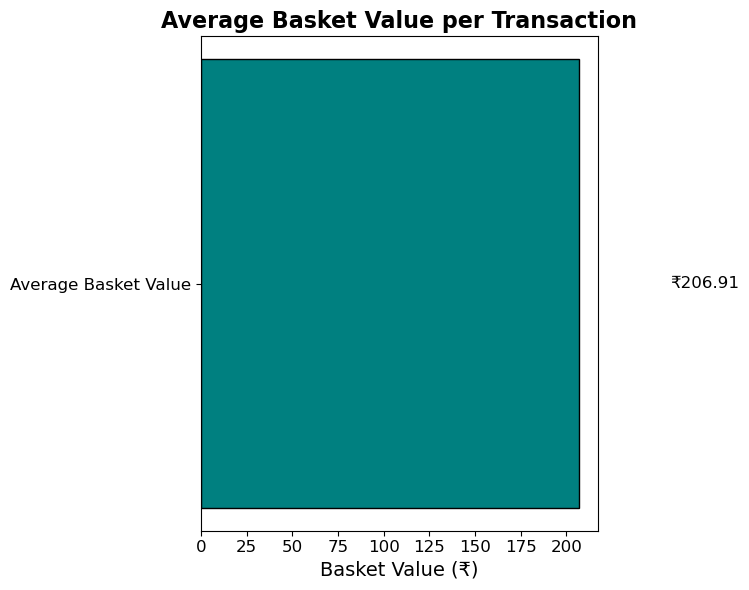

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'harshit.data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Strip whitespace from column names (if any)
data.columns = data.columns.str.strip()

# Calculate the total basket value (final price) per transaction
average_basket_value = data['Final_Price(Rs.)'].mean()

# Display the average basket value
print(f"Average Basket Value per Transaction: ₹{average_basket_value:,.2f}")

# Plot the average basket value as a horizontal bar chart for visual clarity
plt.figure(figsize=(8, 6))
plt.barh(['Average Basket Value'], [average_basket_value], color='teal', edgecolor='black')

# Add data labels to the bar
for index, value in enumerate([average_basket_value]):
    plt.text(value + 50, index, f'₹{value:,.2f}', va='center', fontsize=12)

# Add title and labels
plt.title('Average Basket Value per Transaction', fontsize=16, fontweight='bold')
plt.xlabel('Basket Value (₹)', fontsize=14)
plt.ylabel('', fontsize=14)  # No label needed for y-axis here
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()
